In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


Index(['time', 'lat', 'lon', 'depth', 'CHLA_ADJUSTED'], dtype='object')
Index(['time', 'lat', 'lon', 'depth', 'NITRATE_ADJUSTED'], dtype='object')
               time          lat          lon        depth  CHLA_ADJUSTED
count   2119.000000  2119.000000  2119.000000  2119.000000    2119.000000
mean   44452.283538    52.484046  -139.121322   100.024478       0.230441
std       61.598878     0.482232     0.647187    56.996698       0.293556
min    44350.325752    51.613000  -140.132000     0.892152      -0.000835
25%    44401.243299    52.173000  -139.868000    51.533926       0.008180
50%    44452.196817    52.523000  -138.794000    99.350453       0.046713
75%    44503.484398    52.945000  -138.533000   148.631845       0.432681
max    44553.525428    52.994000  -138.334000   198.160540       1.373467
               time         lat         lon       depth  NITRATE_ADJUSTED
count    863.000000  863.000000  863.000000  863.000000        863.000000
mean   44453.126363   52.477122 -139.11

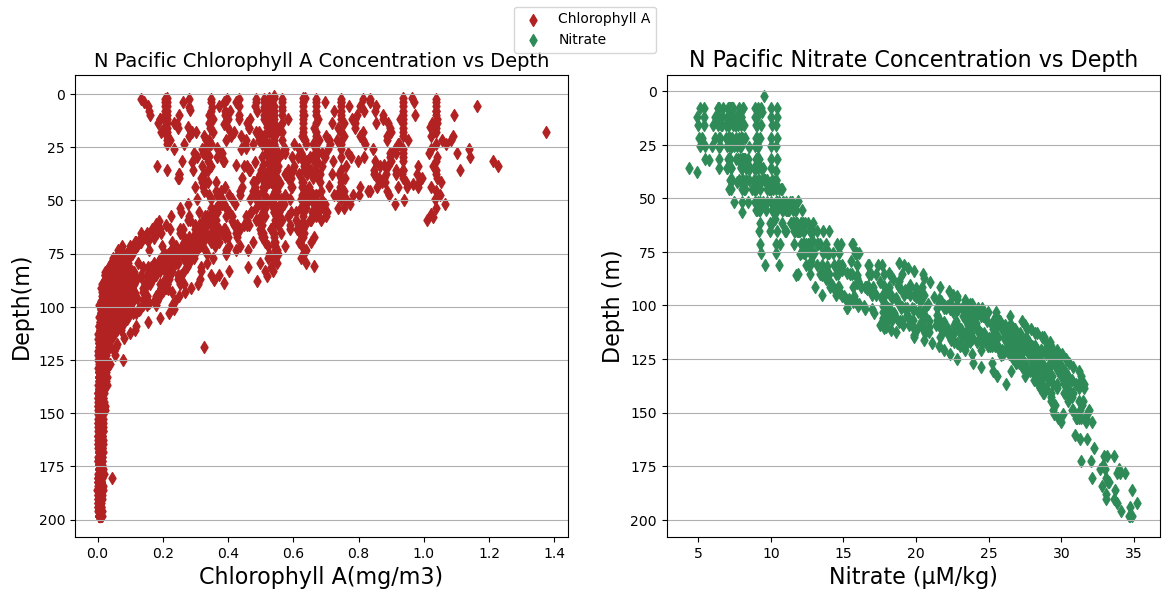

In [2]:
# Load and read Chlorophyll A and Nitrate Northern data from Excel(.xlsx) file
chlA_filepath = 'Adjusted Chlorophyll A.xlsx'
nitr_filepath = 'Nitrate Adjusted.xlsx'
chlA_df = pd.read_excel(chlA_filepath, sheet_name='Data')
nitr_df = pd.read_excel(nitr_filepath, sheet_name='Data')
# Print column names for both datasets
chlA_columns = chlA_df.columns
nitr_columns = nitr_df.columns
print(chlA_columns)
print(nitr_columns)
# describe() function to print summary parameters
print(chlA_df.describe())
print(nitr_df.describe())
# Subplots to display scatter plots for North Pacific data
fig,ax = plt.subplots(1,2, figsize=(14,6))
# North Pacific Chlorophyll A concentration vs. depth plot
ax[0].scatter(chlA_df['CHLA_ADJUSTED'], chlA_df['depth'], c='firebrick', marker='d',label = 'Chlorophyll A')
# Plot elements
ax[0].invert_yaxis()
ax[0].grid(axis='y')
ax[0].set_title('N Pacific Chlorophyll A Concentration vs Depth', fontsize=14)
ax[0].set_xlabel('Chlorophyll A(mg/m3)', fontsize = 16)
ax[0].set_ylabel('Depth(m)', fontsize = 16)
# Nitrate concentration vs. depth scatter plot
ax[1].scatter(nitr_df['NITRATE_ADJUSTED'], nitr_df['depth'], c='seagreen', marker='d',label = 'Nitrate')
# Plot elements
ax[1].invert_yaxis()
ax[1].grid(axis='y')
ax[1].set_title('N Pacific Nitrate Concentration vs Depth', fontsize=16)
ax[1].set_xlabel('Nitrate (µM/kg)', fontsize = 16)
ax[1].set_ylabel('Depth (m)', fontsize = 16)
# Create legend and set location
fig.legend(loc='outside upper center')


               time         lat         lon       depth  CHLA_ADJUSTED
count    180.000000  180.000000  180.000000  180.000000     180.000000
mean   44455.703999   52.461523 -139.106037   94.152292       0.225883
std       35.117645    0.294826    0.330797   50.369804       0.265752
min    44350.325752   51.613000 -140.132000    0.892152       0.004083
25%    44446.707486   52.423578 -139.156067   57.203461       0.013784
50%    44452.158690   52.484762 -139.122667   94.694836       0.079153
75%    44457.249808   52.521988 -139.051716  121.395111       0.453276
max    44553.525428   52.986000 -138.339000  198.145089       1.027638
               time         lat         lon       depth  NITRATE_ADJUSTED
count    141.000000  141.000000  141.000000  141.000000        141.000000
mean   44455.862809   52.464757 -139.103192  103.684412         20.799400
std       39.941351    0.342416    0.377540   44.025104          8.019105
min    44350.325752   51.613000 -140.132000    2.081654          

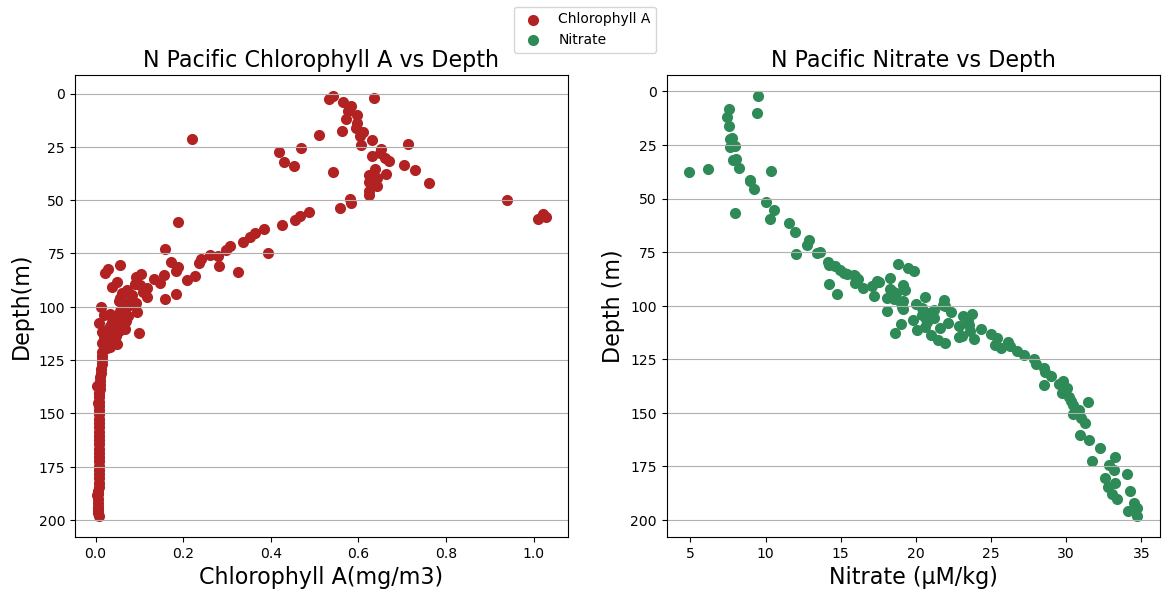

In [3]:
# Round depths of both datasets and calculate mean Chlorophyll A and Nitrate concentrations
chlA_df['round_deep'] = np.round(chlA_df['depth']*2)/2
nitr_df['round_deep'] = np.round(nitr_df['depth']*2)/2
chlA_groupby=chlA_df.groupby('round_deep').mean(numeric_only=True)
nitr_groupby=nitr_df.groupby('round_deep').mean(numeric_only=True)
# Check data statistics
print(chlA_groupby.describe())
print(nitr_groupby.describe())
# Subplots to display scatter plots for grouped data
fig,ax = plt.subplots(1, 2, figsize=(14,6))
# Chlorophyll A concentration vs. rounded depth scatter plot
ax[0].scatter(chlA_groupby['CHLA_ADJUSTED'], chlA_groupby.index, c='firebrick', linestyle='-', linewidth=2, marker=None,label = 'Chlorophyll A')
# Plot elements
ax[0].invert_yaxis()
ax[0].grid(axis='y')
ax[0].set_title('N Pacific Chlorophyll A vs Depth', fontsize=16)
ax[0].set_xlabel('Chlorophyll A(mg/m3)', fontsize = 16)
ax[0].set_ylabel('Depth(m)', fontsize = 16)
# Nitrate concentration vs. rounded depth scatter plot
ax[1].scatter(nitr_groupby['NITRATE_ADJUSTED'], nitr_groupby.index, c='seagreen', linestyle='-', linewidth=2, marker='o', label = 'Nitrate')
# Plot elements
ax[1].invert_yaxis()
ax[1].grid(axis='y')
ax[1].set_title('N Pacific Nitrate vs Depth', fontsize=16)
ax[1].set_xlabel('Nitrate (µM/kg)', fontsize = 16)
ax[1].set_ylabel('Depth (m)', fontsize = 16)
fig.legend(loc='outside upper center')
 

-0.003868747419737566 0.5576452894636554 -0.7877128461434741 3.4287241691106124e-30 0.0002604031911690212
0.1754122157914805 2.62467580190728 0.9634657558666359 4.104132974423705e-79 0.0041968011856841495
0.6204915279794526
Index(['time_x', 'lat_x', 'lon_x', 'depth_x', 'CHLA_ADJUSTED', 'time_y',
       'lat_y', 'lon_y', 'depth_y', 'NITRATE_ADJUSTED', 'chlA_regression',
       'nitr_regression'],
      dtype='object')


,time_x,lat_x,lon_x,depth_x,CHLA_ADJUSTED,time_y,lat_y,lon_y,depth_y,NITRATE_ADJUSTED,chlA_regression,nitr_regression
round_deep,,,,,,,,,,,,
2.0,44468.091592,52.343143,-138.920714,2.081545,0.635449,44533.487963,51.770000,-138.624000,2.081654,9.509968,0.549592,2.989823
8.0,44452.158690,52.484762,-139.122667,7.920050,0.575586,44452.158690,52.484762,-139.122667,7.920050,7.561934,0.527005,4.013949
10.0,44452.158690,52.484762,-139.122667,9.921253,0.596503,44533.487963,51.770000,-138.624000,9.912447,9.406432,0.519262,4.363440
12.0,44452.158690,52.484762,-139.122667,11.898839,0.572308,44448.092227,52.520500,-139.147600,11.899037,7.451050,0.511612,4.711912
16.0,44452.158690,52.484762,-139.122667,15.853951,0.595098,44452.158690,52.484762,-139.122667,15.853951,7.537808,0.496310,5.405652
...,...,...,...,...,...,...,...,...,...,...,...,...
190.0,44452.158690,52.484762,-139.122667,190.222964,0.006385,44502.861123,52.068000,-138.756500,190.230047,33.347042,-0.178279,35.993350
192.0,44452.158690,52.484762,-139.122667,192.203524,0.006112,44447.269850,52.572500,-139.183500,192.202015,34.531605,-0.185942,36.339257
194.5,44442.009016,52.785000,-139.143000,194.297676,0.006541,44442.009016,52.785000,-139.143000,194.297676,34.731148,-0.194043,36.706862


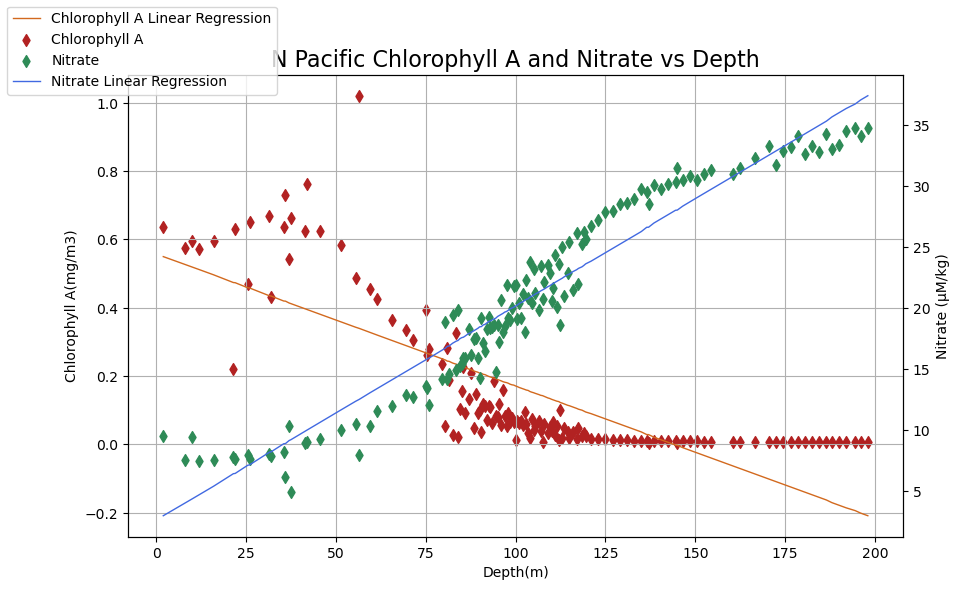

In [4]:
# Merge grouped data for Chlorophyll A and Nitrate for same shape
merged_df = pd.merge(chlA_groupby, nitr_groupby, on='round_deep', how='inner')
# Perform linear regression on merged Chlorophyll A and Nitrate data and print values
slope_chlA, intercept_chlA, rvalue_chlA, pvalue_chlA, stderr_chlA = stats.linregress(merged_df['depth_x'], merged_df['CHLA_ADJUSTED'])
slope_nitr, intercept_nitr, rvalue_nitr, pvalue_nitr, stderr_nitr = stats.linregress(merged_df['depth_y'], merged_df['NITRATE_ADJUSTED'])
print(slope_chlA, intercept_chlA, rvalue_chlA, pvalue_chlA, stderr_chlA)
print(slope_nitr, intercept_nitr, rvalue_nitr, pvalue_nitr, stderr_nitr)
r_squared = rvalue_chlA ** 2
print(r_squared)
# Calculate linear regression fit and store in variable_regression column
merged_df['chlA_regression'] = intercept_chlA + slope_chlA * merged_df['depth_x']
merged_df['nitr_regression'] = intercept_nitr + slope_nitr * merged_df['depth_y']
# Display merged dataframe details
merged_columns = merged_df.columns
print(merged_columns)
display(merged_df)
# Subplots to display scatter plots for merged data
fig,axs=plt.subplots(figsize=(10,6))
# Plot Chlorophyll A and Nitrate linear regression on scatter plot
axs.plot(merged_df.index, merged_df['chlA_regression'], color='chocolate', lw=1, label=f'Chlorophyll A Linear Regression')
axs.scatter(merged_df.index, merged_df['CHLA_ADJUSTED'], color='firebrick', marker='d', label='Chlorophyll A')
# Twinax for plotting data on both y axes
twinax = axs.twinx()
twinax.scatter(merged_df.index, merged_df['NITRATE_ADJUSTED'], color='seagreen', lw=1, marker='d', label='Nitrate')
twinax.plot(merged_df.index, merged_df['nitr_regression'], color='royalblue', lw=1, label=f'Nitrate Linear Regression')
# Plot elements
fig.legend(loc='upper left')
axs.set_title('N Pacific Chlorophyll A and Nitrate vs Depth', fontsize=16)
axs.set_xlabel('Depth(m)')
axs.set_ylabel('Chlorophyll A(mg/m3)')
twinax.set_ylabel('Nitrate (µM/kg)')
axs.grid()


Index(['time', 'lat', 'lon', 'depth', 'CHLA_ADJUSTED'], dtype='object')
Index(['time', 'lat', 'lon', 'depth', 'NITRATE_ADJUSTED'], dtype='object')
               time          lat          lon        depth  CHLA_ADJUSTED
count   8882.000000  8882.000000  8882.000000  8882.000000    8882.000000
mean   43924.412632   -13.065086   -86.039383    87.341140       0.180955
std       54.681106     0.370770     0.235529    62.445331       0.195736
min    43832.401389   -13.438728   -86.517097     0.099422      -0.127750
25%    43877.397917   -13.356818   -86.203300    31.236581       0.011753
50%    43922.609028   -13.171165   -86.079400    82.027996       0.109306
75%    43972.235417   -12.923652   -85.798337   142.246486       0.313900
max    44017.445139   -11.971377   -85.695808   199.960256       1.682650
               time         lat         lon       depth  NITRATE_ADJUSTED
count    763.000000  763.000000  763.000000  763.000000        763.000000
mean   44295.758280   -6.769527  -98.13

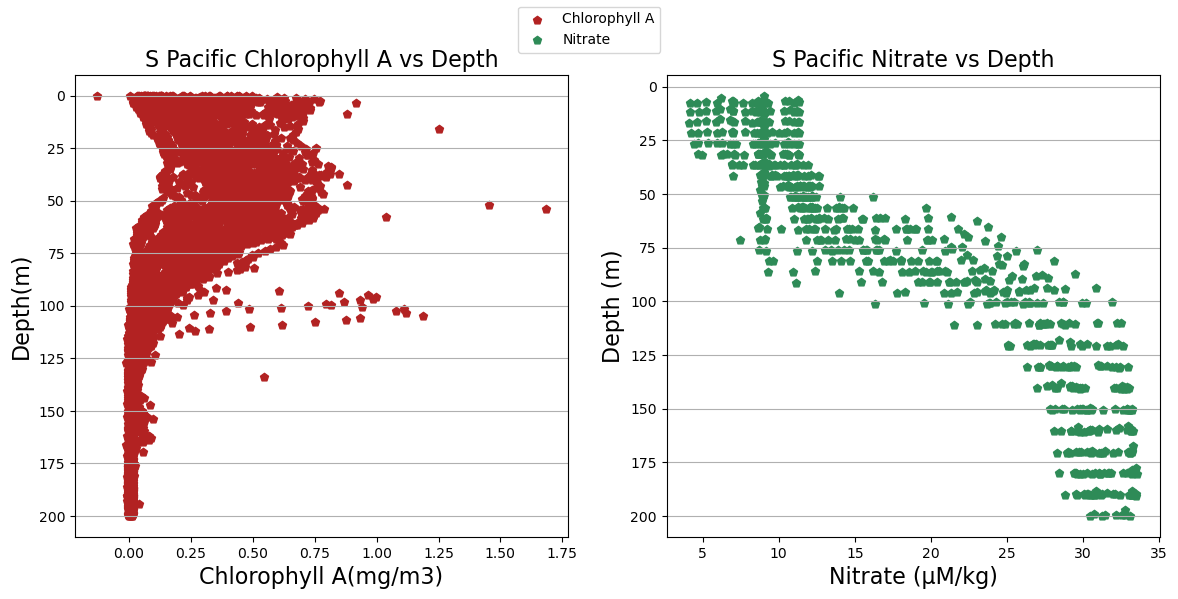

In [5]:
# Load and read Chlorophyll A and Nitrate Southern data from Excel(.xlsx) file
south_chlA_filepath = 'Adjusted Chlorophyll A (2).xlsx'
south_nitr_filepath = 'Nitrate Adjusted (1).xlsx'
south_chlA_df = pd.read_excel(south_chlA_filepath, sheet_name='Data')
south_nitr_df = pd.read_excel(south_nitr_filepath, sheet_name='Data')
# Check columns data parameters
south_chlA_columns = south_chlA_df.columns
south_nitr_columns = south_nitr_df.columns
print(south_chlA_columns)
print(south_nitr_columns)
print(south_chlA_df.describe())
print(south_nitr_df.describe())
# Subplots to plot Southern Chlorophyll A and Nitrate vs. depth 
fig,ax = plt.subplots(1,2, figsize=(14,6))
#Southern Chlorophyll A vs. depth plotting
ax[0].scatter(south_chlA_df['CHLA_ADJUSTED'], south_chlA_df['depth'], c='firebrick', linestyle='-', linewidth=1, marker='p',label = 'Chlorophyll A')
# Plot elements
ax[0].invert_yaxis()
ax[0].grid(axis='y')
ax[0].set_title('S Pacific Chlorophyll A vs Depth', fontsize=16)
ax[0].set_xlabel('Chlorophyll A(mg/m3)', fontsize = 16)
ax[0].set_ylabel('Depth(m)', fontsize = 16)
#Southern Nitrate vs. depth plotting
ax[1].scatter(south_nitr_df['NITRATE_ADJUSTED'], south_nitr_df['depth'], c='seagreen', linestyle='-', linewidth=1, marker='p',label = 'Nitrate')
# Plot elements
ax[1].invert_yaxis()
ax[1].grid(axis='y')
ax[1].set_title('S Pacific Nitrate vs Depth', fontsize=16)
ax[1].set_xlabel('Nitrate (µM/kg)', fontsize = 16)
ax[1].set_ylabel('Depth (m)', fontsize = 16)
fig.legend(loc='outside upper center')

               time         lat         lon       depth  CHLA_ADJUSTED
count    401.000000  401.000000  401.000000  401.000000     401.000000
mean   43924.613808  -13.064022  -86.040413   99.999234       0.166649
std        9.999973    0.071114    0.044565   57.951518       0.166240
min    43892.365741  -13.245785  -86.196794    0.120355       0.002722
25%    43918.824040  -13.113287  -86.065464   50.028933       0.010349
50%    43924.146493  -13.067441  -86.039998  100.029965       0.115362
75%    43930.550950  -13.018813  -86.013615  150.034852       0.315919
max    43957.125308  -12.770795  -85.887817  199.857561       0.505252
               time         lat         lon       depth  NITRATE_ADJUSTED
count    141.000000  141.000000  141.000000  141.000000        141.000000
mean   44298.866793   -6.768449  -98.036045   87.814067         20.320191
std       39.024898    0.142753    0.935561   54.945901          9.432089
min    44208.009005   -7.088000 -100.259000    4.246158          

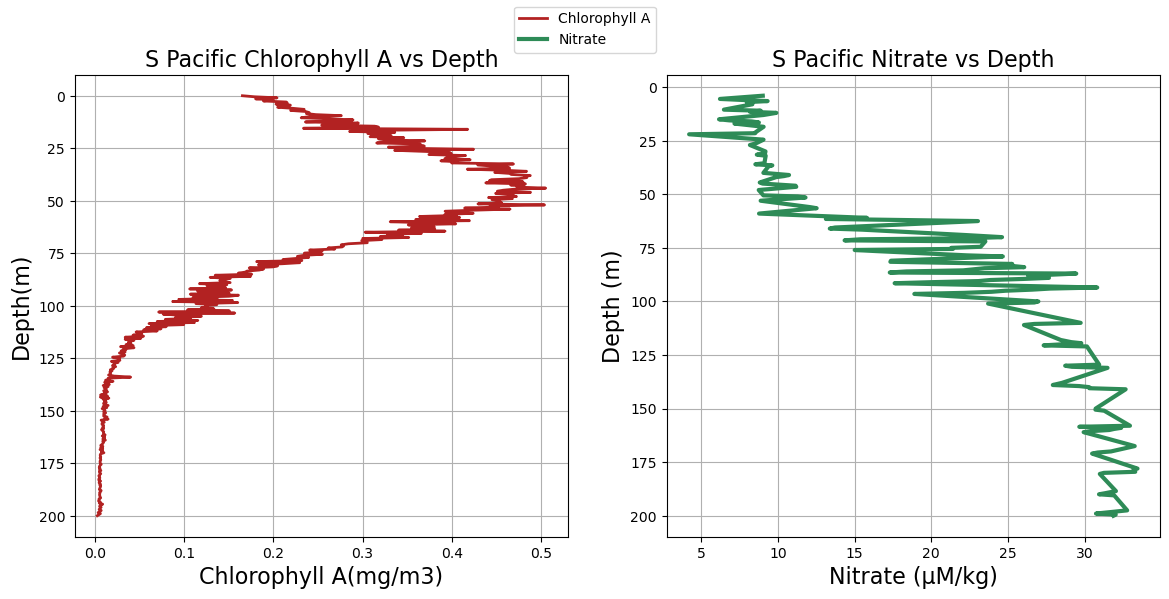

In [6]:
# Round depths of both south datasets 
south_chlA_df['round_deep'] = np.round(south_chlA_df['depth']*2)/2
south_nitr_df['round_deep'] = np.round(south_nitr_df['depth']*2)/2
#Calculate the mean south Chlorophyll A and Nitrate concentrations with grouped depths
south_chlA_groupby=south_chlA_df.groupby('round_deep').mean(numeric_only=True)
south_nitr_groupby=south_nitr_df.groupby('round_deep').mean(numeric_only=True)
# Check data parameters
print(south_chlA_groupby.describe())
print(south_nitr_groupby.describe())
# Subplots to display scatter plots for grouped data
fig,ax = plt.subplots(1, 2, figsize=(14,6))
# Southern Chlorophyll A concentration vs. rounded depth scatter plot
ax[0].plot(south_chlA_groupby['CHLA_ADJUSTED'], south_chlA_groupby.index, c='firebrick', linestyle='-', linewidth=2, marker=None,label = 'Chlorophyll A')
ax[0].invert_yaxis()
ax[0].grid()
ax[0].set_title('S Pacific Chlorophyll A vs Depth', fontsize=16)
ax[0].set_xlabel('Chlorophyll A(mg/m3)', fontsize = 16)
ax[0].set_ylabel('Depth(m)', fontsize = 16)
# Southern Nitrate concentration vs. rounded depth scatter plot
ax[1].plot(south_nitr_groupby['NITRATE_ADJUSTED'], south_nitr_groupby.index, c='seagreen', linestyle='-', linewidth=3, marker=None,label = 'Nitrate')
ax[1].invert_yaxis()
ax[1].grid()
ax[1].set_title('S Pacific Nitrate vs Depth', fontsize=16)
ax[1].set_xlabel('Nitrate (µM/kg)', fontsize = 16)
ax[1].set_ylabel('Depth (m)', fontsize = 16)
fig.legend(loc='outside upper center')
 

-0.002441961848800027 0.41328818051644567 -0.8377371660407007 2.4163800542966875e-38 0.00013501279215384355
0.15819435942730178 6.428501425042855 0.9215489862504214 5.66193005343214e-59 0.005653145697666449
0.7018035593659046
Index(['time_x', 'lat_x', 'lon_x', 'depth_x', 'CHLA_ADJUSTED', 'time_y',
       'lat_y', 'lon_y', 'depth_y', 'NITRATE_ADJUSTED', 'chlA_regression',
       'nitr_regression'],
      dtype='object')
             time_x       lat_x       lon_x     depth_x  CHLA_ADJUSTED   
count    141.000000  141.000000  141.000000  141.000000     141.000000  \
mean   43924.147602  -13.062733  -86.039334   87.790704       0.198907   
std        9.078007    0.071564    0.046187   54.940312       0.160148   
min    43901.316528  -13.216356  -86.192582    3.982860       0.002722   
25%    43918.824040  -13.116000  -86.067039   42.004362       0.020124   
50%    43923.946312  -13.064302  -86.035771   83.020492       0.181373   
75%    43929.371451  -13.024194  -86.011050  129.974486    

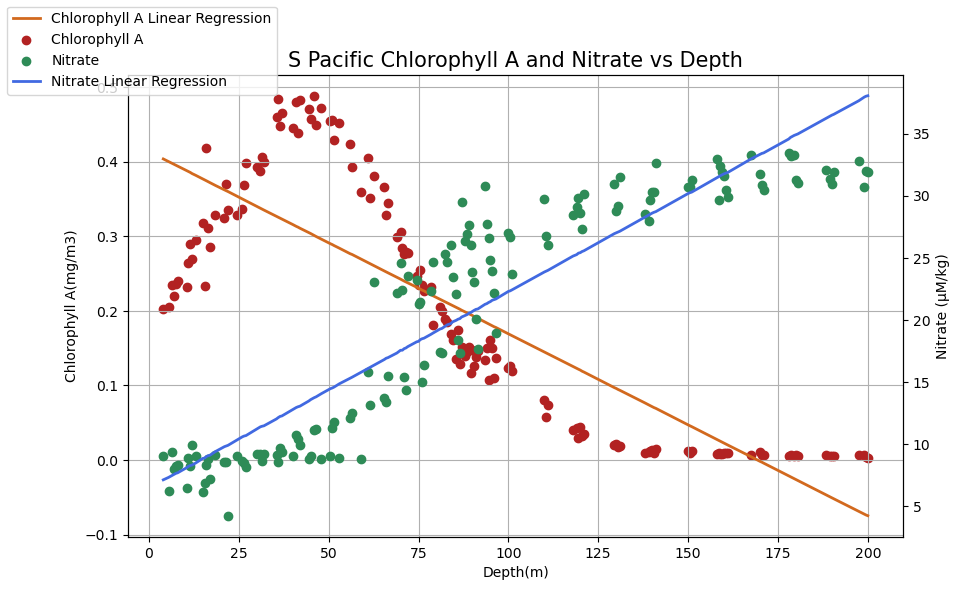

In [7]:
# Merge grouped South Pacific data for Chlorophyll A and Nitrate for same shape by round_deep
south_merged_df = pd.merge(south_chlA_groupby, south_nitr_groupby, on='round_deep', how='inner')
# Linear regression for South Pacific Chlorophyll A and Nitrate 
south_slope_chlA, south_intercept_chlA, south_rvalue_chlA, south_pvalue_chlA, south_stderr_chlA = stats.linregress(south_merged_df['depth_x'], south_merged_df['CHLA_ADJUSTED'])
south_slope_nitr, south_intercept_nitr, south_rvalue_nitr, south_pvalue_nitr, south_stderr_nitr = stats.linregress(south_merged_df['depth_y'], south_merged_df['NITRATE_ADJUSTED'])
# Print to check data
print(south_slope_chlA, south_intercept_chlA, south_rvalue_chlA, south_pvalue_chlA, south_stderr_chlA)
print(south_slope_nitr, south_intercept_nitr, south_rvalue_nitr, south_pvalue_nitr, south_stderr_nitr)
south_r_squared = south_rvalue_chlA ** 2
print(south_r_squared)
# Store linear regression fit in new columns
south_merged_df['chlA_regression'] = south_intercept_chlA + south_slope_chlA * south_merged_df['depth_x']
south_merged_df['nitr_regression'] = south_intercept_nitr + south_slope_nitr * south_merged_df['depth_y']
# Check data
south_merged_columns = south_merged_df.columns
print(south_merged_columns)
print(south_merged_df.describe())
# Create figure
fig,axs=plt.subplots(figsize=(10,6))
# Plot Southern Chlorophyll A linear progression over scatter
axs.plot(south_merged_df.index, south_merged_df['chlA_regression'], color='chocolate', lw=2, label=f'Chlorophyll A Linear Regression')
axs.scatter(south_merged_df.index, south_merged_df['CHLA_ADJUSTED'], color='firebrick', marker='o', label='Chlorophyll A')
# Twin axis for Southern Nitrate data
twinax = axs.twinx()
twinax.scatter(south_merged_df.index, south_merged_df['NITRATE_ADJUSTED'], color='seagreen', marker='o', label='Nitrate')
twinax.plot(south_merged_df.index, south_merged_df['nitr_regression'], color='royalblue', lw=2, label=f'Nitrate Linear Regression')
# Create plot elements
fig.legend(loc='upper left')
axs.set_title('S Pacific Chlorophyll A and Nitrate vs Depth', fontsize=15)
axs.set_xlabel('Depth(m)')
axs.set_ylabel('Chlorophyll A(mg/m3)')
twinax.set_ylabel('Nitrate (µM/kg)')
axs.grid()

-0.002441961848800027 -0.8377371660407007 2.4163800542966875e-38
0.15819435942730178 0.9215489862504214 5.66193005343214e-59
0.7018035593659046
-0.003868747419737566 -0.7877128461434741 3.4287241691106124e-30
0.1754122157914805 0.9634657558666359 4.104132974423705e-79
0.6204915279794526


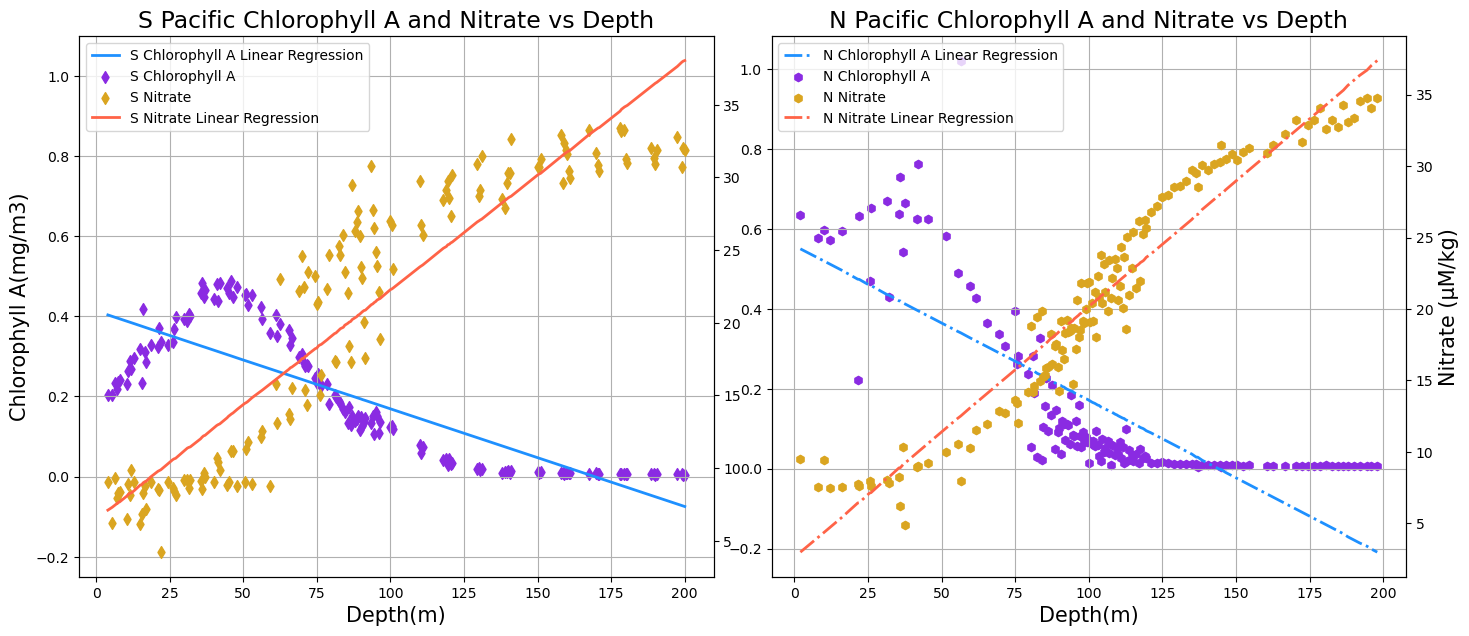

In [8]:
# Display regression values for North and South Chlorophyll A and Nitrate
print(south_slope_chlA, south_rvalue_chlA, south_pvalue_chlA)
print(south_slope_nitr, south_rvalue_nitr, south_pvalue_nitr)
south_r_squared = south_rvalue_chlA ** 2
print(south_r_squared)
print(slope_chlA, rvalue_chlA, pvalue_chlA)
print(slope_nitr, rvalue_nitr, pvalue_nitr)
r_squared = rvalue_chlA ** 2
print(r_squared)

# Subplots for South and North Chlorophyll A and Nitrate vs. Depth
fig,axs=plt.subplots(1,2, figsize=(14,6))
plt.tight_layout()
# Plot South Pacific Chlorophyll A and Nitrate vs. Depth on left subplot with linear regression and twin axes
axs[0].plot(south_merged_df.index, south_merged_df['chlA_regression'], color='dodgerblue', lw=2, label=f'S Chlorophyll A Linear Regression')
axs[0].scatter(south_merged_df.index, south_merged_df['CHLA_ADJUSTED'], color='blueviolet', marker='d', label='S Chlorophyll A')
twinax = axs[0].twinx()
twinax.scatter(south_merged_df.index, south_merged_df['NITRATE_ADJUSTED'], color='goldenrod', marker='d', label='S Nitrate')
twinax.plot(south_merged_df.index, south_merged_df['nitr_regression'], color='tomato', lw=2, label=f'S Nitrate Linear Regression')
#Plot elements
axs[0].set_title('S Pacific Chlorophyll A and Nitrate vs Depth', fontsize=17)
axs[0].set_xlabel('Depth(m)', fontsize=15)
axs[0].set_ylabel('Chlorophyll A(mg/m3)', fontsize=15)
axs[0].grid()
axs[0].set_ylim(-0.25, 1.1)
# Plot North Pacific Chlorophyll A and Nitrate vs. Depth on right subplot with linear regression and twin axes
axs[1].plot(merged_df.index, merged_df['chlA_regression'], color='dodgerblue', lw=2, linestyle='dashdot', label=f'N Chlorophyll A Linear Regression')
axs[1].scatter(merged_df.index, merged_df['CHLA_ADJUSTED'], color='blueviolet', marker='h', label='N Chlorophyll A')
twinax1 = axs[1].twinx()
twinax1.scatter(merged_df.index, merged_df['NITRATE_ADJUSTED'], color='goldenrod', marker='h', label='N Nitrate')
twinax1.plot(merged_df.index, merged_df['nitr_regression'], color='tomato', lw=2, linestyle='dashdot', label=f'N Nitrate Linear Regression')
# Plot elements
axs[1].set_title('N Pacific Chlorophyll A and Nitrate vs Depth', fontsize=17)
axs[1].set_xlabel('Depth(m)', fontsize=15)
twinax1.set_ylabel('Nitrate (µM/kg)', fontsize=15)
axs[1].grid()
# Legend handles and labels for each subplot
handles, labels = axs[0].get_legend_handles_labels()
handles0, labels0 = twinax.get_legend_handles_labels()
handles1, labels1 = axs[1].get_legend_handles_labels()
handles2, labels2 = twinax1.get_legend_handles_labels()
# Create legends for each subplot
legend = axs[0].legend(handles + handles0, labels + labels0, loc='upper left')
legend0 = axs[1].legend(handles1 + handles2, labels1 + labels2, loc='upper left')